# WHEAT CLASSIFIER

##### Predict categories of wheat using GradientBoostingClassifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [2]:
df = pd.read_csv('DATA/wheat.csv')
df.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


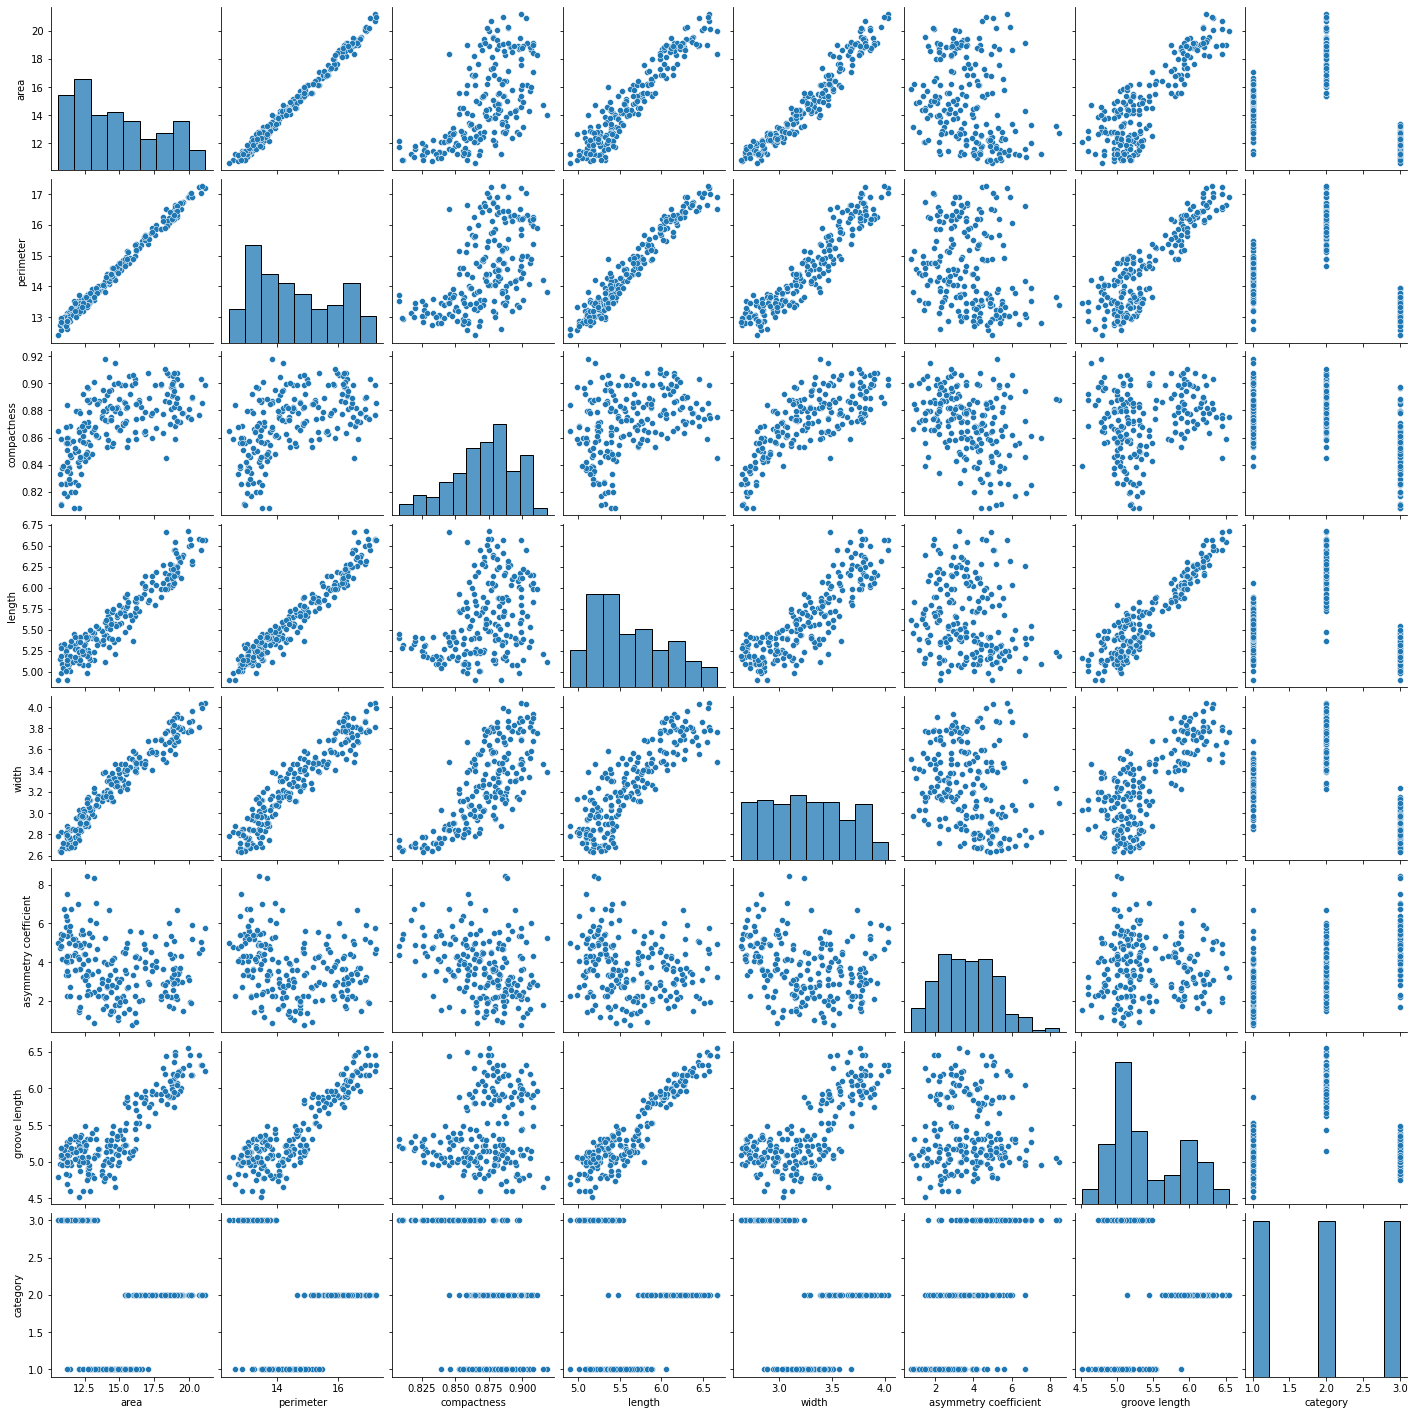

In [4]:
sns.pairplot(df)

##### Correlations

<AxesSubplot: >

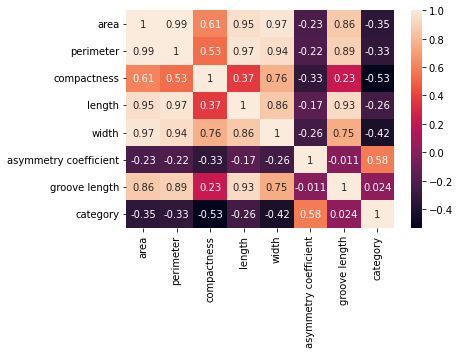

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.corr()['category'].sort_values()

compactness             -0.531007
width                   -0.423463
area                    -0.346058
perimeter               -0.327900
length                  -0.257269
groove length            0.024301
asymmetry coefficient    0.577273
category                 1.000000
Name: category, dtype: float64

##### Drop 'groove length' feature

In [7]:
df.drop('groove length', axis=1, inplace=True)
df

,area,perimeter,compactness,length,width,asymmetry coefficient,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,1.0
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,3.0


### PREPARING THE DATA BEFORE THE TRAINING

In [8]:
X = df.drop('category', axis=1)
y = df['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### MODEL TRAINING

Using Grid Search to find best hyperparameters for GradientBoostingClassifier

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
ada = GradientBoostingClassifier()

params = {'n_estimators': [1,2,3,4,5],
          'learning_rate': [0.01, 0.1, 0.2, 0.3]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(ada,params)
grid.fit(X_train, y_train)
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, n_estimators=5)

### PERFORMANCE EVALUATION

In [10]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

##### TRAIN DATA

In [11]:
train_pred = grid.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95        44
         2.0       0.98      1.00      0.99        55
         3.0       0.94      1.00      0.97        48

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



##### TEST DATA

In [12]:
test_pred = grid.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.62      0.76        26
         2.0       0.65      1.00      0.79        15
         3.0       0.92      1.00      0.96        22

    accuracy                           0.84        63
   macro avg       0.86      0.87      0.84        63
weighted avg       0.89      0.84      0.84        63



#### Confusion Matrix

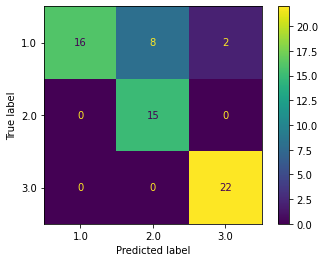

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)